# VAN ó NPV

**VAN ó Valor Actual Neto (Net Present Value en inglés)** *Consiste en actualizar los cobros o pagos de una inversión o proyecto al momento presente, de manera que obtenemos una medida en términos absolutos que nos permita comparar para decidir cuál es la opción más interesante*

*Su fórmula podemos verla en la siguiente imagen*

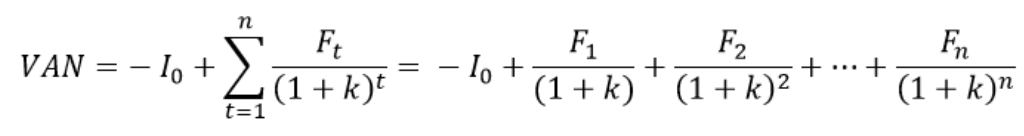

*En realidad, lo que hacemos para calcular el VAN es traer descontar los flujos de caja al origen*

**Lo primero, importamos las librerías que vamos a necesitar**

In [4]:
pip install numpy-financial

In [5]:
import numpy_financial as npf

**Vamos a ver un ejemplo práctico en Python**

*Imaginemos que queremos calcular la rentabilidad de un proyecto, en el que tenemos que desembolsar 1.000 euros, y después sabemos que nos va a reportar unos flujos de caja de 200 € el primer año, 300 € el segundo, 1000 euros el tercero, 500 euros el cuarto. La tasa de descuento es 5%. Vamos a ver varios métodos para calcular el VAN*

In [26]:
#Método 1.

cf=[-1000, 200, 300, 1000, 500]    #Generamos una lista con los flujos de caja. Nótese que el primero es negativo.
r = 0.05                           #La tasa de descuento
f = 1+r

VAN = 0
for i in range(len(cf)):
    VAN += cf[i]/f**(i)

    
print(VAN)

737.7738699410224


El siguiente método es equivalente a la función en Excel **VAN** (Español) **NPV** (Inglés)

El funcionamiento es exactamente igual, y nos requiere los mimos parámetros, por un lado la tasa de descuento y por otro los flujos de caja generados. En este caso, hay una diferencia respecto a Excel, ya que el desemboloso inicial en Excel debe estar fuera de los flujos de caja, restando esta cantidad fuera de la fórmula financiera de Excel. Sin embargo, en Python debe estar incluído en los flujos de caja.

In [25]:
#Método 2

cf=[-1000, 200, 300, 1000, 500]    #Generamos una lista con los flujos de caja. Nótese que el primero es negativo.
r = 0.05                           #La tasa de descuento
f = 1+r

VAN2 = npf.npv(rate=r, values=cf)
print(VAN2)

737.7738699410224


In [33]:
#Método 3

import numpy as np

cf = np.array(cf)
r = 0.05
f = 1+r
n = np.array([0, 1, 2, 3, 4])

VA = cf / f**n
VAN = VA.sum()
print(VAN)

737.7738699410224


In [35]:
#Método 4

VAN = (cf/f**n).sum()
print(VAN)

737.7738699410224


*Acabamos de ver 4 formas distintas de calcular el Valor Actual Neto en Python.*

*Si quiesieramos utilizar Excel para realizar estos cálculos, debemos utilizar la fórmula VAN o NPV en inglés, y nos pedirá una tasa de descuento y los flujos de caja, tal como funciona la opción 2 que acabamos de ver, solo que hay que tener en cuenta que mientras en Python contamos con todos los flujos de caja dentro de la función, en Excel debemos sacar t0, para sumarlo al final, sería algo así como: **=VNA(tasa;flujo caja año 1: flujo de caja año n)+cft0**.*

# TIR ó IRR

**La tasa interna de retorno (TIR)** *es la tasa de interés o rentabilidad que ofrece una inversión. Es decir, es el porcentaje de beneficio o pérdida que tendrá una inversión para las cantidades que no se han retirado del proyecto. También se define como el valor de la tasa de descuento que hace que el VAN sea igual a cero, para un proyecto de inversión dado*

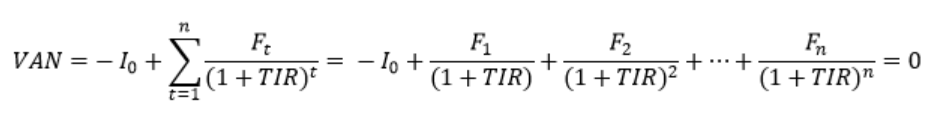


**Lo primero, de nuevo, importar las librerías que necesitamos**

In [ ]:
pip install numpy-financial

In [ ]:
import numpy_financial as npf
import matplotlib.pyplot as plt

**Vamos a ver un ejemplo práctico con el mismo ejercicio anterior y los diferentes métodos de cálculo**

*Imaginemos que queremos calcular la rentabilidad de un proyecto, en el que tenemos que desembolsar 1.000 euros, y después sabemos que nos va a reportar unos flujos de caja de 200 € el primer año, 300 € el segundo, 1000 euros el tercero, 500 euros el cuarto. La tasa de descuento es 5%. Vamos a ver varios métodos para calcular el VAN*

In [13]:
#Método 1.

cf=[-1000, 200, 300, 1000, 500]    #Generamos una lista con los flujos de caja. Nótese que el primero es negativo.
r = 0.05                           #La tasa de descuento
f = 1+r
paso = 0.000001
objetivo = 0                       #Recordemos que la TIR es el momento en el que VAN = 0, ese es mi objetivo
tolerancia = 0.001

while True:
    f = 1 + r
    VAN = 0
    for i in range(len(cf)):
        VAN += cf[i]/f**(i)
    diff = VAN - objetivo
    
    if abs(diff) > tolerancia:
        if diff < 0:
            r -= paso
        elif diff > 0:
            r += paso
    
    else:
        break
        
print(VAN, r)


-0.0002973604021008214 0.2811679999993661


*Explicación de la fórmula que hemos desarrollado*

*Le pedimos a Python que nos calcule el VAN por cada periodo, y a la par le pedimos que nos calcule la rentabilidad hasta ese momento. La rentabilidad que buscamos se encuentra en el momento en el que nuestro VAN es 0. Por ello, establecemos un bucle while que va calculando el VAN y la rentabilidad hasta llegar a ese momento. Como marcadores creamos la tolerancia, que podemos disminuir para ajustar al máximo, cuanta menor sea nuestra tolerancia más tiempo tarda Python en darnos una respuesta.*

*En este caso nuesta rentabilidad es de un 28,11 %*

In [43]:
#Método 2

cf=[-1000, 200, 300, 1000, 500]    #Generamos una lista con los flujos de caja. Nótese que el primero es negativo.
r = 0.05                           #La tasa de descuento

TIR = npf.irr(cf)
print(TIR)


0.28116785840687086


El método 2 es equivanlente a la fórmula en Excel **TIR** (Español) o **IRR** (Inglés). 

Los parámetros necesarios son los mismos, teniendo en cuenta que si un año no se produce flujo de caja hay que indicarlo mediante un 0, al igual que en Excel.

*Vamos ahora a visualizar mediante una gráfica dónde se encuentra nuestra TIR*

In [83]:
cf=[-1000, 200, 300, 1000, 500]
r = 0.05

VAN = 0
for i in range(len(cf)):
    VAN += cf[i]/(1+r)**(i)    #Generamos el VAN de nuestro proyecto

L = list(range(0,351))         #Vamos a generar una lista de supuestos tipos de interés, va poder ver como cambia nuestro VAN

rs = []
for i in L:
    rs.append(i/1000)

vans = []                      #Calculamos el VAN para cada uno de los intereses generados en la anterior lista.
for i in rs:
    van = 0
    for j in range(len(cf)):
        van += cf[j]/(1+i)**(j)
    vans.append(van)
    

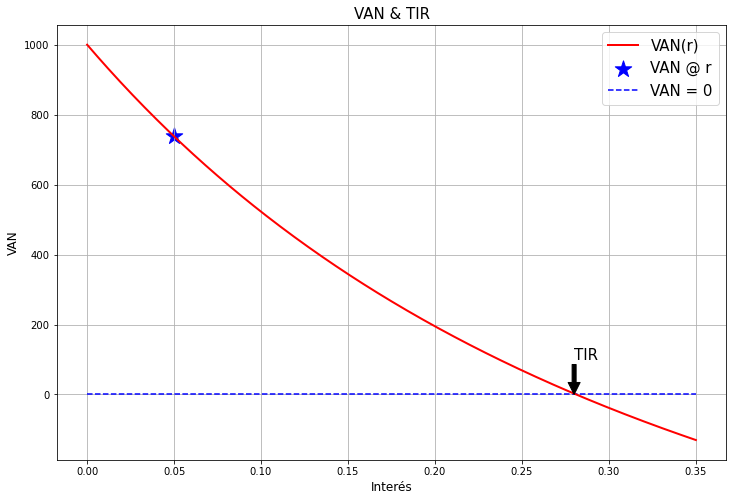

In [81]:
plt.figure(figsize = (12, 8))
plt.scatter(x = r, y = VAN, s = 300, c="blue", marker = '*', label = "VAN @ r")
plt.plot(rs, vans, color = "red", linewidth = 2, linestyle='-', label = "VAN(r)")
plt.grid()
plt.hlines(y=0, xmin = rs[0], xmax=rs[-1], linestyle="dashed", color="blue", label="VAN = 0")
plt.title("VAN & TIR", fontsize=15)
plt.xlabel("Interés", fontsize=12)
plt.ylabel("VAN", fontsize=12)
plt.annotate("TIR", xy = (0.280, 0), xytext=(0.280, 100), arrowprops = {'color':'black'}, fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.show()


*En este gráfico podemos comprobar cómo el VAN va variando a distintos tipos de interés (línea roja). Tenemos que tener en cuenta que este sería un proyecto, por tanto, a mayor tipo de interés más costosa será nuestra financiación y por tanto disminuye nuestro VAN. En la línea azul nos marca cuando VAN = 0, y justo cuando se cruza con nuestra línea roja podemos decir que nos encontramos con el TIR*

# Payback o Periodo Medio de Retorno.

*Cuando analizamos un proyecto, no solo tenemos en cuenta el VAN y su TIR, debemos valorar otros factores, como son el tiempo en el que vamos a recuperar nuestra inversión, conocido como Periodo Medio de Maduración o Payback en inglés. Vamos a realizar una fórmula, que nos permita analizar esta variable*

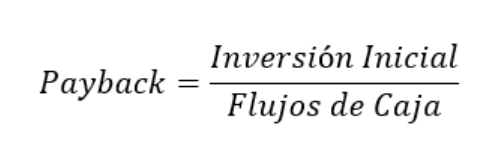

*Esta es la fórmula de Payback, y vamos a realizar un ejemplo en Python*

In [2]:
FC = [-2000, 200, 1500, 700, 100, 500] #Flujos de caja de un proyecto

Acum_FC = 0

for i in range(len(FC)):
    Acum_FC += FC[i]
    
    if Acum_FC > 0:
        print("El Payback del Proyecto son {} años". format(i))
        break
        
    elif Acum_FC <= 0 and i == len(FC)-1:
        print("El proyecto no recupera su inversión")

El Payback del Proyecto son 3 años


# ÍNDICE DE RENTABILIDAD#

*El índice de rentabilidad nos permite realizar un ranking de distintos proyectos teniendo en cuenta el que mayor valor va a aportar a nuestra empresa. Su fórmula es: *

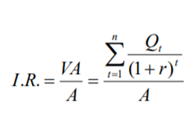

*En nuestro anterior ejemplo:*

In [12]:
FC = [-2000, 200, 1500, 700, 100, 500]
r = 0.05
II = []
FCP = []

for i in FC:
    if i < 0:
        II.append(i)
    else:
        FCP.append(i)
        
VA = npf.npv(r, FCP)

IR = VA / II
print(-IR)

[1.38061353]
